In [1]:
# %load week09.py
"""
Created on Tue Sep 13 16:13:55 2016

@author: Administrator
"""
import nltk

####信息提取####
def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document) 
    sentences = [nltk.word_tokenize(sent) for sent in sentences] 
    sentences = [nltk.pos_tag(sent) for sent in sentences]

### 名词短语分块

In [2]:
####分块####
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), 
    ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
grammar = "NP: {<DT>?<JJ>*<NN>}" 
cp = nltk.RegexpParser(grammar) 

In [3]:
result = cp.parse(sentence)  

In [4]:
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [ ]:
result.draw()

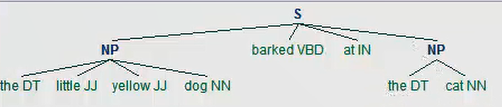

In [23]:
import jieba 
import jieba.posseg as pseg

In [31]:
pseg.cut('小黄狗朝着小猫叫')

<generator object cut at 0x7f0e609eb0a0>

In [32]:
pseg.lcut('这是一只很可爱的小黄狗')

[pair('这', 'r'),
 pair('是', 'v'),
 pair('一只', 'm'),
 pair('很', 'zg'),
 pair('可爱', 'v'),
 pair('的', 'uj'),
 pair('小', 'a'),
 pair('黄狗', 'nr')]

In [29]:
pseg.lcut('小黄狗朝着小猫叫')

[pair('小', 'a'),
 pair('黄狗', 'nr'),
 pair('朝着', 'p'),
 pair('小猫', 'n'),
 pair('叫', 'v')]

In [30]:
for word,flag in pseg.cut('小黄狗朝着小猫叫'):
    print(word,flag)

小 a
黄狗 nr
朝着 p
小猫 n
叫 v


In [50]:
sentence = [(word,flag) for word,flag in pseg.cut('小黄狗朝着小猫叫')]
grammar = "NP: {<a>?<n.*>}" 
cp = nltk.RegexpParser(grammar) 
print(cp.parse(sentence))

(S (NP 小/a 黄狗/nr) 朝着/p (NP 小猫/n) 叫/v)


In [34]:
[(word,flag) for word,flag in pseg.cut('小黄狗朝着小猫叫')]

[('小', 'a'), ('黄狗', 'nr'), ('朝着', 'p'), ('小猫', 'n'), ('叫', 'v')]

In [38]:
sentence = [('我', 'o'), ('感觉', 'o'), ('胸口', 'bw'), ('有点', 'o'), ('疼', 'zz'), (',', 'o'), ('恶心', 'zz')]
grammar = "部位症状关系: {<bw><o>*<zz><o>*<zz>}" 
cp = nltk.RegexpParser(grammar) 
print(cp.parse(sentence))

(S 我/o 感觉/o (部位症状关系 胸口/bw 有点/o 疼/zz ,/o 恶心/zz))


In [39]:
#也许刚开始就把所有的o都忽略掉
sentence = [('胸口', 'bw'),('疼', 'zz'), ('头', 'bw'),('疼', 'zz'), ('胀', 'zz')]
grammar = "部位症状关系: {<bw><o>*<zz>+}" 
cp = nltk.RegexpParser(grammar) 
print(cp.parse(sentence))

(S (部位症状关系 胸口/bw 疼/zz) (部位症状关系 头/bw 疼/zz 胀/zz))


In [40]:
list(cp.parse(sentence))

[Tree('部位症状关系', [('胸口', 'bw'), ('疼', 'zz')]),
 Tree('部位症状关系', [('头', 'bw'), ('疼', 'zz'), ('胀', 'zz')])]

In [49]:
for i in cp.parse(sentence):
    print(type(i))
    print(i)
    print(i[0])
    print(i[1:])

<class 'nltk.tree.Tree'>
(部位症状关系 胸口/bw 疼/zz)
('胸口', 'bw')
[('疼', 'zz')]
<class 'nltk.tree.Tree'>
(部位症状关系 头/bw 疼/zz 胀/zz)
('头', 'bw')
[('疼', 'zz'), ('胀', 'zz')]


In [42]:
for i in list(cp.parse(sentence)):
    print(i)

(部位症状关系 胸口/bw 疼/zz)
(部位症状关系 头/bw 疼/zz 胀/zz)


In [25]:
#正则表达式分块
grammar = r"""
NP: {<DT|PP\$>?<JJ>*<NN>} # chunk determiner/possessive, adjectives and nouns
{<NNP>+} # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"), 
("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]
result = cp.parse(sentence)
print(result)

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


In [28]:
str(result)

'(S\n  (NP Rapunzel/NNP)\n  let/VBD\n  down/RP\n  (NP her/PP$ long/JJ golden/JJ hair/NN))'

In [29]:
type(result)

nltk.tree.Tree

In [30]:
result.__str__

<bound method Tree.__str__ of Tree('S', [Tree('NP', [('Rapunzel', 'NNP')]), ('let', 'VBD'), ('down', 'RP'), Tree('NP', [('her', 'PP$'), ('long', 'JJ'), ('golden', 'JJ'), ('hair', 'NN')])])>

In [26]:
nouns = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN>+} # Chunk two consecutive nouns"
cp = nltk.RegexpParser(grammar)
print (cp.parse(nouns))

(S (NP money/NN market/NN fund/NN))


In [27]:
#探索文本语料库
cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
brown = nltk.corpus.brown
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK': print (subtree)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK get/VB to/TO hear/VB)
(CHUNK expects/VBZ to/TO tell/VB)
(CHUNK expected/VBN to/TO give/VB)
(CHUNK prefer/VB to/TO pay/VB)
(CHUNK required/VBN to/TO obtain/VB)
(CHUNK permitted/VBN to/TO teach/VB)
(CHUNK designed/VBN to/TO reduce/VB)
(CHUNK Asked/VBN to/TO elaborate/VB)
(CHUNK got/VBN to/TO go/VB)
(CHUNK raised/VBN to/TO pay/VB)
(CHUNK scheduled/VBN to/TO go/VB)
(CHUNK cut/VBN to/TO meet/VB)
(CHUNK needed/VBN to/TO meet/VB)
(CHUNK hastened/VBD to/TO add/VB)
(CHUNK found/VBN to/TO prevent/VB)
(CHUNK continue/VB to/TO insist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK mad

(CHUNK tried/VBD to/TO settle/VB)
(CHUNK pass/VB to/TO enter/VB)
(CHUNK came/VBD to/TO tell/VB)
(CHUNK wanted/VBD to/TO grab/VB)
(CHUNK stops/VBZ to/TO think/VB)
(CHUNK expect/VB to/TO get/VB)
(CHUNK chosen/VBN to/TO answer/VB)
(CHUNK motivated/VBN to/TO seek/VB)
(CHUNK disposed/VBD to/TO covet/VB)
(CHUNK like/VB to/TO lie/VB)
(CHUNK going/VBG to/TO tell/VB)
(CHUNK prepared/VBN to/TO accept/VB)
(CHUNK try/VB to/TO stop/VB)
(CHUNK try/VB to/TO stop/VB)
(CHUNK sought/VBD to/TO break/VB)
(CHUNK inclined/VBN to/TO look/VB)
(CHUNK begun/VBN to/TO act/VB)
(CHUNK elect/VB to/TO slow/VB)
(CHUNK like/VB to/TO challenge/VB)
(CHUNK going/VBG to/TO move/VB)
(CHUNK asked/VBN to/TO carry/VB)
(CHUNK expect/VB to/TO stop/VB)
(CHUNK expect/VB to/TO reduce/VB)
(CHUNK expected/VBN to/TO supply/VB)
(CHUNK supposed/VBN to/TO win/VB)
(CHUNK seems/VBZ to/TO lack/VB)
(CHUNK tends/VBZ to/TO treat/VB)
(CHUNK like/VB to/TO share/VB)
(CHUNK try/VB to/TO treat/VB)
(CHUNK try/VB to/TO bring/VB)
(CHUNK try/VB to/TO 

(CHUNK need/VB to/TO discipline/VB)
(CHUNK attempts/VBZ to/TO trace/VB)
(CHUNK conspire/VB to/TO defy/VB)
(CHUNK learning/VBG to/TO think/VB)
(CHUNK wants/VBZ to/TO know/VB)
(CHUNK wants/VBZ to/TO supply/VB)
(CHUNK begin/VB to/TO look/VB)
(CHUNK start/VB to/TO think/VB)
(CHUNK attempt/VB to/TO say/VB)
(CHUNK come/VBN to/TO feel/VB)
(CHUNK supposed/VBN to/TO put/VB)
(CHUNK called/VBN to/TO work/VB)
(CHUNK continue/VB to/TO exist/VB)
(CHUNK observed/VBN to/TO characterize/VB)
(CHUNK continue/VB to/TO alienate/VB)
(CHUNK continue/VB to/TO preach/VB)
(CHUNK means/VBZ to/TO say/VB)
(CHUNK fit/VBN to/TO place/VB)
(CHUNK concerned/VBN to/TO stand/VB)
(CHUNK strive/VB to/TO formulate/VB)
(CHUNK proceeded/VBD to/TO give/VB)
(CHUNK offer/VB to/TO remind/VB)
(CHUNK offered/VBN to/TO allow/VB)
(CHUNK requested/VBN to/TO teach/VB)
(CHUNK said/VBN to/TO repeat/VB)
(CHUNK mean/VB to/TO say/VB)
(CHUNK inclined/VBN to/TO extenuate/VB)
(CHUNK came/VBD to/TO rescue/VB)
(CHUNK venture/VB to/TO assert/VB)


(CHUNK come/VB to/TO spend/VB)
(CHUNK managed/VBD to/TO irrigate/VB)
(CHUNK stooped/VBD to/TO scoop/VB)
(CHUNK fall/VB to/TO show/VB)
(CHUNK try/VB to/TO push/VB)
(CHUNK begins/VBZ to/TO deteriorate/VB)
(CHUNK used/VBD to/TO like/VB)
(CHUNK offered/VBD to/TO ship/VB)
(CHUNK hopes/VBZ to/TO find/VB)
(CHUNK invented/VBN to/TO hold/VB)
(CHUNK learn/VB to/TO like/VB)
(CHUNK labored/VBD to/TO set/VB)
(CHUNK set/VBN to/TO receive/VB)
(CHUNK entered/VBN to/TO compete/VB)
(CHUNK seem/VB to/TO make/VB)
(CHUNK seemed/VBD to/TO answer/VB)
(CHUNK decided/VBD to/TO use/VB)
(CHUNK began/VBD to/TO show/VB)
(CHUNK Wishing/VBG to/TO show/VB)
(CHUNK learned/VBD to/TO set/VB)
(CHUNK forced/VBN to/TO fly/VB)
(CHUNK hope/VB to/TO break/VB)
(CHUNK came/VBD to/TO recognize/VB)
(CHUNK turning/VBG to/TO cup/VB)
(CHUNK seems/VBZ to/TO creep/VB)
(CHUNK going/VBG to/TO live/VB)
(CHUNK got/VBN to/TO learn/VB)
(CHUNK going/VBG to/TO live/VB)
(CHUNK like/VB to/TO sew/VB)
(CHUNK love/VB to/TO run/VB)
(CHUNK love/VB t

(CHUNK refused/VBD to/TO come/VB)
(CHUNK undertook/VBD to/TO set/VB)
(CHUNK essayed/VBD to/TO down/VB)
(CHUNK began/VBD to/TO prosper/VB)
(CHUNK liked/VBD to/TO wring/VB)
(CHUNK happened/VBD to/TO sit/VB)
(CHUNK hastened/VBN to/TO place/VB)
(CHUNK began/VBD to/TO offer/VB)
(CHUNK seemed/VBD to/TO indicate/VB)
(CHUNK liked/VBD to/TO imagine/VB)
(CHUNK expected/VBN to/TO know/VB)
(CHUNK began/VBD to/TO appear/VB)
(CHUNK begin/VB to/TO store/VB)
(CHUNK continue/VB to/TO sanction/VB)
(CHUNK intended/VBN to/TO demonstrate/VB)
(CHUNK permitted/VBN to/TO exercise/VB)
(CHUNK encouraged/VBN to/TO develop/VB)
(CHUNK failing/VBG to/TO behave/VB)
(CHUNK appeared/VBD to/TO regard/VB)
(CHUNK seek/VB to/TO disprove/VB)
(CHUNK tends/VBZ to/TO fuse/VB)
(CHUNK prefers/VBZ to/TO adduce/VB)
(CHUNK empowered/VBN to/TO compel/VB)
(CHUNK designed/VBN to/TO prevent/VB)
(CHUNK disposed/VBN to/TO heed/VB)
(CHUNK agree/VB to/TO let/VB)
(CHUNK seeking/VBG to/TO reform/VB)
(CHUNK used/VBD to/TO crowd/VB)
(CHUNK As

(CHUNK decided/VBD to/TO migrate/VB)
(CHUNK continued/VBD to/TO trouble/VB)
(CHUNK labored/VBD to/TO finish/VB)
(CHUNK decided/VBD to/TO return/VB)
(CHUNK waiting/VBG to/TO go/VB)
(CHUNK chosen/VBN to/TO serve/VB)
(CHUNK came/VBD to/TO know/VB)
(CHUNK helped/VBN to/TO escape/VB)
(CHUNK opened/VBN to/TO admit/VB)
(CHUNK happened/VBD to/TO see/VB)
(CHUNK brought/VBN to/TO bear/VB)
(CHUNK inclined/VBN to/TO argue/VB)
(CHUNK seeming/VBG to/TO say/VB)
(CHUNK prompted/VBN to/TO write/VB)
(CHUNK come/VBN to/TO dominate/VB)
(CHUNK used/VBN to/TO illustrate/VB)
(CHUNK prepared/VBN to/TO find/VB)
(CHUNK wish/VB to/TO argue/VB)
(CHUNK begin/VB to/TO read/VB)
(CHUNK plan/VB to/TO discuss/VB)
(CHUNK come/VBN to/TO call/VB)
(CHUNK expect/VB to/TO find/VB)
(CHUNK come/VBN to/TO believe/VB)
(CHUNK continue/VB to/TO pay/VB)
(CHUNK tend/VB to/TO thump/VB)
(CHUNK determined/VBN to/TO prove/VB)
(CHUNK learn/VB to/TO control/VB)
(CHUNK used/VBN to/TO frustrate/VB)
(CHUNK trying/VBG to/TO assert/VB)
(CHUNK 

(CHUNK enter/VB to/TO ask/VB)
(CHUNK seems/VBZ to/TO lie/VB)
(CHUNK continued/VBD to/TO shape/VB)
(CHUNK seem/VB to/TO pass/VB)
(CHUNK prepared/VBN to/TO accept/VB)
(CHUNK done/VBN to/TO obtaine/VB)
(CHUNK expected/VBN to/TO reach/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK tried/VBD to/TO consult/VB)
(CHUNK came/VBD to/TO put/VB)
(CHUNK seemed/VBN to/TO promise/VB)
(CHUNK needed/VBD to/TO possess/VB)
(CHUNK seem/VB to/TO indicate/VB)
(CHUNK purports/VBZ to/TO examine/VB)
(CHUNK attempts/VBZ to/TO understand/VB)
(CHUNK tend/VB to/TO disprove/VB)
(CHUNK forced/VBN to/TO admit/VB)
(CHUNK attempt/VB to/TO ascertain/VB)
(CHUNK forced/VBN to/TO demonstrate/VB)
(CHUNK sought/VBD to/TO maintain/VB)
(CHUNK determined/VBN to/TO resist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK threatening/VBG to/TO murder/VB)
(CHUNK agreed/VBD to/TO see/VB)
(CHUNK learned/VBN to/TO know/VB)
(CHUNK written/VBN to/TO say/VB)
(CHUNK came/VBD to/TO see/VB)
(CHUNK liked/VBD to/TO think/VB)
(CHUNK chosen/VBN to/T

(CHUNK helping/VBG to/TO strengthen/VB)
(CHUNK began/VBD to/TO ship/VB)
(CHUNK believed/VBN to/TO provide/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK expect/VB to/TO make/VB)
(CHUNK developed/VBN to/TO facilitate/VB)
(CHUNK set/VBN to/TO hold/VB)
(CHUNK continuing/VBG to/TO carry/VB)
(CHUNK designed/VBN to/TO increase/VB)
(CHUNK improved/VBN to/TO obtain/VB)
(CHUNK purchased/VBN to/TO permit/VB)
(CHUNK extended/VBN to/TO provide/VB)
(CHUNK sought/VBN to/TO meet/VB)
(CHUNK designed/VBN to/TO handle/VB)
(CHUNK invited/VBN to/TO participate/VB)
(CHUNK planned/VBN to/TO provide/VB)
(CHUNK inclined/VBN to/TO advance/VB)
(CHUNK aims/VBZ to/TO give/VB)
(CHUNK wish/VB to/TO pursue/VB)
(CHUNK expected/VBN to/TO increase/VB)
(CHUNK expected/VBN to/TO exceed/VB)
(CHUNK begun/VBN to/TO make/VB)
(CHUNK continues/VBZ to/TO expand/VB)
(CHUNK began/VBD to/TO make/VB)
(CHUNK need/VB to/TO learn/VB)
(CHUNK working/VBG to/TO attain/VB)
(CHUNK begun/VBN to/TO translate/VB)
(CHUNK besieged/VBN to/TO s

(CHUNK held/VBN to/TO constitute/VB)
(CHUNK seem/VB to/TO support/VB)
(CHUNK designed/VBN to/TO cover/VB)
(CHUNK found/VBN to/TO vary/VB)
(CHUNK taken/VBN to/TO rest/VB)
(CHUNK needs/VBZ to/TO know/VB)
(CHUNK attempts/VBZ to/TO stand/VB)
(CHUNK wishing/VBG to/TO know/VB)
(CHUNK made/VBN to/TO appear/VB)
(CHUNK attempts/VBZ to/TO supply/VB)
(CHUNK like/VB to/TO record/VB)
(CHUNK claims/VBZ to/TO show/VB)
(CHUNK mean/VB to/TO assert/VB)
(CHUNK mean/VB to/TO assert/VB)
(CHUNK prepared/VBD to/TO say/VB)
(CHUNK mean/VB to/TO say/VB)
(CHUNK sought/VBD to/TO express/VB)
(CHUNK said/VBD to/TO learn/VB)
(CHUNK mean/VB to/TO say/VB)
(CHUNK meant/VBD to/TO say/VB)
(CHUNK meant/VBD to/TO say/VB)
(CHUNK meant/VBD to/TO express/VB)
(CHUNK forced/VBN to/TO go/VB)
(CHUNK disposed/VBN to/TO quarrel/VB)
(CHUNK seem/VB to/TO present/VB)
(CHUNK allowed/VBN to/TO move/VB)
(CHUNK tended/VBD to/TO reflect/VB)
(CHUNK beginning/VBG to/TO appreciate/VB)
(CHUNK begun/VBN to/TO disturb/VB)
(CHUNK venture/VB to/TO

(CHUNK want/VB to/TO kill/VB)
(CHUNK intend/VB to/TO go/VB)
(CHUNK wanted/VBN to/TO hurt/VB)
(CHUNK bother/VB to/TO think/VB)
(CHUNK delighted/VBN to/TO see/VB)
(CHUNK began/VBD to/TO weep/VB)
(CHUNK began/VBD to/TO move/VB)
(CHUNK tried/VBD to/TO push/VB)
(CHUNK tried/VBD to/TO rescue/VB)
(CHUNK seemed/VBD to/TO hold/VB)
(CHUNK began/VBD to/TO think/VB)
(CHUNK strove/VBD to/TO think/VB)
(CHUNK run/VB to/TO tell/VB)
(CHUNK fail/VB to/TO hear/VB)
(CHUNK dared/VBD to/TO wait/VB)
(CHUNK dared/VBD to/TO pat/VB)
(CHUNK trying/VBG to/TO push/VB)
(CHUNK began/VBD to/TO whirl/VB)
(CHUNK started/VBD to/TO worry/VB)
(CHUNK tried/VBD to/TO push/VB)
(CHUNK wanted/VBD to/TO get/VB)
(CHUNK tryin/VBG to/TO fuck/VB)
(CHUNK tried/VBD to/TO stifle/VB)
(CHUNK seeking/VBG to/TO kill/VB)
(CHUNK failed/VBD to/TO check/VB)
(CHUNK tried/VBD to/TO shut/VB)
(CHUNK refuses/VBZ to/TO believe/VB)
(CHUNK begun/VBN to/TO study/VB)
(CHUNK amazed/VBN to/TO discover/VB)
(CHUNK appear/VB to/TO reject/VB)
(CHUNK trying/V

(CHUNK used/VBD to/TO keep/VB)
(CHUNK forget/VB to/TO turn/VB)
(CHUNK promised/VBD to/TO observe/VB)
(CHUNK started/VBD to/TO plod/VB)
(CHUNK tried/VBD to/TO turn/VB)
(CHUNK beginning/VBG to/TO feel/VB)
(CHUNK decided/VBD to/TO indulge/VB)
(CHUNK forgotten/VBN to/TO turn/VB)
(CHUNK meant/VBN to/TO shut/VB)
(CHUNK want/VB to/TO leave/VB)
(CHUNK want/VB to/TO go/VB)
(CHUNK got/VBD to/TO remember/VB)
(CHUNK got/VBD to/TO put/VB)
(CHUNK threaten/VB to/TO call/VB)
(CHUNK need/VB to/TO take/VB)
(CHUNK going/VBG to/TO get/VB)
(CHUNK get/VB to/TO know/VB)
(CHUNK paused/VBD to/TO look/VB)
(CHUNK seemed/VBD to/TO remember/VB)
(CHUNK Happened/VBN to/TO hear/VB)
(CHUNK got/VBN to/TO get/VB)
(CHUNK begun/VBN to/TO tell/VB)
(CHUNK begun/VBN to/TO question/VB)
(CHUNK began/VBD to/TO doubt/VB)
(CHUNK wished/VBD to/TO frighten/VB)
(CHUNK need/VB to/TO break/VB)
(CHUNK wished/VBN to/TO make/VB)
(CHUNK tried/VBN to/TO give/VB)
(CHUNK got/VBN to/TO eat/VB)
(CHUNK attempt/VB to/TO frighten/VB)
(CHUNK tryin

(CHUNK going/VBG to/TO wait/VB)
(CHUNK started/VBD to/TO slump/VB)
(CHUNK started/VBD to/TO run/VB)
(CHUNK goin'/VBG to/TO kill/VB)
(CHUNK fighting/VBG to/TO hold/VB)
(CHUNK started/VBD to/TO slump/VB)
(CHUNK forgot/VBD to/TO aim/VB)
(CHUNK started/VBD to/TO raise/VB)
(CHUNK seem/VB to/TO tell/VB)
(CHUNK want/VB to/TO see/VB)
(CHUNK meant/VBN to/TO insult/VB)
(CHUNK meant/VBD to/TO say/VB)
(CHUNK tried/VBD to/TO step/VB)
(CHUNK tried/VBD to/TO break/VB)
(CHUNK seemed/VBD to/TO pull/VB)
(CHUNK seemed/VBD to/TO change/VB)
(CHUNK want/VB to/TO know/VB)
(CHUNK start/VB to/TO work/VB)
(CHUNK straining/VBG to/TO stay/VB)
(CHUNK Go/VB to/TO sleep/VB)
(CHUNK stop/VB to/TO graze/VB)
(CHUNK bothered/VBD to/TO speak/VB)
(CHUNK attempted/VBD to/TO salvage/VB)
(CHUNK seemed/VBD to/TO indicate/VB)
(CHUNK attempted/VBD to/TO form/VB)
(CHUNK tried/VBD to/TO pick/VB)
(CHUNK appeared/VBD to/TO disapprove/VB)
(CHUNK expected/VBN to/TO find/VB)
(CHUNK decided/VBD to/TO see/VB)
(CHUNK go/VB to/TO look/VB)


(CHUNK like/VB to/TO hear/VB)
(CHUNK come/VBN to/TO make/VB)
(CHUNK started/VBD to/TO move/VB)
(CHUNK bent/VBD to/TO pick/VB)
(CHUNK permitted/VBN to/TO operate/VB)
(CHUNK beginning/VBG to/TO get/VB)
(CHUNK seemed/VBD to/TO think/VB)
(CHUNK tried/VBD to/TO make/VB)
(CHUNK wanted/VBD to/TO present/VB)
(CHUNK expected/VBN to/TO stay/VB)
(CHUNK wish/VB to/TO start/VB)
(CHUNK got/VBN to/TO run/VB)
(CHUNK like/VB to/TO talk/VB)
(CHUNK disappointed/VBN to/TO find/VB)
(CHUNK tried/VBN to/TO reason/VB)
(CHUNK trying/VBG to/TO close/VB)
(CHUNK want/VB to/TO help/VB)
(CHUNK surprised/VBN to/TO see/VB)
(CHUNK trying/VBG to/TO find/VB)
(CHUNK neglected/VBD to/TO play/VB)
(CHUNK wanted/VBD to/TO call/VB)
(CHUNK like/VB to/TO offer/VB)
(CHUNK want/VB to/TO say/VB)
(CHUNK wished/VBD to/TO see/VB)
(CHUNK overheard/VBN to/TO say/VB)
(CHUNK like/VB to/TO get/VB)
(CHUNK expected/VBN to/TO perform/VB)
(CHUNK going/VBG to/TO bring/VB)
(CHUNK seek/VB to/TO storm/VB)
(CHUNK used/VBN to/TO defend/VB)
(CHUNK s

(CHUNK trouble/VB to/TO memorize/VB)
(CHUNK deigned/VBD to/TO appear/VB)
(CHUNK seemed/VBD to/TO understand/VB)
(CHUNK try/VB to/TO revive/VB)
(CHUNK seemed/VBD to/TO produce/VB)
(CHUNK returning/VBG to/TO jump/VB)
(CHUNK tried/VBD to/TO farm/VB)
(CHUNK going/VBG to/TO set/VB)
(CHUNK turned/VBD to/TO stare/VB)
(CHUNK seem/VB to/TO think/VB)
(CHUNK liked/VBD to/TO hire/VB)
(CHUNK remember/VB to/TO telephone/VB)
(CHUNK like/VB to/TO work/VB)
(CHUNK like/VB to/TO disclose/VB)
(CHUNK got/VBD to/TO put/VB)
(CHUNK got/VBN to/TO run/VB)
(CHUNK waiting/VBG to/TO get/VB)
(CHUNK need/VB to/TO worry/VB)
(CHUNK seems/VBZ to/TO think/VB)
(CHUNK tries/VBZ to/TO baffle/VB)
(CHUNK mean/VB to/TO reconsider/VB)
(CHUNK refused/VBD to/TO make/VB)
(CHUNK seems/VBZ to/TO make/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK seems/VBZ to/TO say/VB)
(CHUNK delighted/VBN to/TO meet/VB)
(CHUNK like/VB to/TO know/VB)
(CHUNK regret/VB to/TO say/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK come/VBN to/TO talk/VB)
(CHUNK

In [31]:
#加缝隙
grammar = r"""
NP:
{<.*>+} # Chunk everything
}<VBD|IN>+{ # Chink sequences of VBD and IN
"""
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)
print (cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [51]:
####开发与评估分块器
text = '''he PRP B-NP
accepted VBD B-VP
the DT B-NP
position NN I-NP
of IN B-PP
vice NN B-NP
chairman NN I-NP
of IN B-PP
Carlyle NNP B-NP
Group NNP I-NP
, , O
a DT B-NP
merchant NN I-NP
banking NN I-NP
concern NN I-NP
. . O
'''

In [ ]:
nltk.chunk.conllstr2tree(text, chunk_types=['NP']).draw()

In [52]:
from nltk.corpus import conll2000
print (conll2000.chunked_sents('train.txt')[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [53]:
print (conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


In [20]:
#简单评估和基准
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print (cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [21]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print (cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [54]:
#使用unigram标注器对名词短语分块
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data) 
        
    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                        in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [55]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print (unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [56]:
postags = sorted(set(pos for sent in train_sents for (word,pos) in sent.leaves()))
print (unigram_chunker.tagger.tag(postags))

[('#', 'B-NP'), ('$', 'B-NP'), ("''", 'O'), ('(', 'O'), (')', 'O'), (',', 'O'), ('.', 'O'), (':', 'O'), ('CC', 'O'), ('CD', 'I-NP'), ('DT', 'B-NP'), ('EX', 'B-NP'), ('FW', 'I-NP'), ('IN', 'O'), ('JJ', 'I-NP'), ('JJR', 'B-NP'), ('JJS', 'I-NP'), ('MD', 'O'), ('NN', 'I-NP'), ('NNP', 'I-NP'), ('NNPS', 'I-NP'), ('NNS', 'I-NP'), ('PDT', 'B-NP'), ('POS', 'B-NP'), ('PRP', 'B-NP'), ('PRP$', 'B-NP'), ('RB', 'O'), ('RBR', 'O'), ('RBS', 'B-NP'), ('RP', 'O'), ('SYM', 'O'), ('TO', 'O'), ('UH', 'O'), ('VB', 'O'), ('VBD', 'O'), ('VBG', 'O'), ('VBN', 'O'), ('VBP', 'O'), ('VBZ', 'O'), ('WDT', 'B-NP'), ('WP', 'B-NP'), ('WP$', 'B-NP'), ('WRB', 'O'), ('``', 'O')]


In [57]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data) 
        
    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                        in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [58]:
bigram_chunker = BigramChunker(train_sents)
print (bigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  93.3%%
    Precision:     82.3%%
    Recall:        86.8%%
    F-Measure:     84.5%%


In [59]:
#训练基于分类器的分块器
class ConsecutiveNPChunkTagger(nltk.TaggerI): 
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history) 
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.MaxentClassifier.train( train_set, trace=0)
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)
class ConsecutiveNPChunker(nltk.ChunkParserI): 
    def __init__(self, train_sents):
        tagged_sents = [[((w,t),c) for (w,t,c) in nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)
    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)        
        
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

In [60]:
chunker = ConsecutiveNPChunker(train_sents)
print(chunker.evaluate(test_sents))    

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [61]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]
    return {"pos": pos, "prevpos": prevpos}
chunker = ConsecutiveNPChunker(train_sents)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  93.6%%
    Precision:     82.0%%
    Recall:        87.2%%
    F-Measure:     84.6%%


In [62]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]
    return {"pos": pos, "word": word, "prevpos": prevpos}
chunker = ConsecutiveNPChunker(train_sents)
print(chunker.evaluate(test_sents)) 

ChunkParse score:
    IOB Accuracy:  94.6%%
    Precision:     84.6%%
    Recall:        89.8%%
    F-Measure:     87.1%%


In [63]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]
    if i == len(sentence)-1:
        nextword, nextpos = "<END>", "<END>"
    else:
        nextword, nextpos = sentence[i+1]
    return {"pos": pos,
            "word": word,
            "prevpos": prevpos,
            "nextpos": nextpos,
            "prevpos+pos": "%s+%s" % (prevpos, pos),
        "pos+nextpos": "%s+%s" % (pos, nextpos),
        "tags-since-dt": tags_since_dt(sentence, i)}
def tags_since_dt(sentence, i):
    tags = set()
    for word, pos in sentence[:i]:
        if pos == 'DT':
            tags = set()
        else:
            tags.add(pos)
        return '+'.join(sorted(tags))
chunker = ConsecutiveNPChunker(train_sents)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  95.9%%
    Precision:     87.9%%
    Recall:        91.1%%
    F-Measure:     89.5%%


In [ ]:
####语言结构中的递归####
#用级联分块器构建嵌套结构
grammar = r"""
NP: {<DT|JJ|NN.*>+} # Chunk sequences of DT, JJ, NN
PP: {<IN><NP>} # Chunk prepositions followed by NP
VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
CLAUSE: {<NP><VP>} # Chunk NP, VP
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"),
("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]
print(cp.parse(sentence))

sentence = [("John", "NNP"), ("thinks", "VBZ"), ("Mary", "NN"),
("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"),
("on", "IN"), ("the", "DT"), ("mat", "NN")]
print(cp.parse(sentence))

cp = nltk.RegexpParser(grammar, loop=2)
print(cp.parse(sentence))

#树
tree1 = nltk.Tree('NP', ['Alice'])
print(tree1)
tree2 = nltk.Tree('NP', ['the', 'rabbit'])
print(tree2)

tree3 = nltk.Tree('VP', ['chased', tree2])
tree4 = nltk.Tree('S', [tree1, tree3])
print(tree4)

print(tree4[1])

tree4[1].label() 

tree4.leaves()

tree4[1][1][1]

tree4.draw()

#遍历树
def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t),
    else:
        # Now we know that t.node is defined
        print '(', t.label(),
        for child in t:
            traverse(child)
        print ')',
traverse(tree4)

####命名实体识别####
sent = nltk.corpus.treebank.tagged_sents()[22]
print nltk.ne_chunk(sent, binary=True)

print nltk.ne_chunk(sent)

####关系抽取####
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,corpus='ieer', pattern = IN):
        print nltk.sem.relextract.rtuple(rel)
        
from nltk.corpus import conll2002
vnv = """
(
is/V| # 3rd sing present and
was/V| # past forms of the verb zijn ('be')
werd/V| # and also present
wordt/V # past of worden ('become')
)
.* # followed by anything
van/Prep # followed by van ('of')
"""
VAN = re.compile(vnv, re.VERBOSE)
for doc in conll2002.chunked_sents('ned.train'):
    for r in nltk.sem.extract_rels('PER', 'ORG', doc,corpus='conll2002', pattern=VAN):
        print nltk.sem.relextract.rtuple(r)       